(-0.5, 1196.5, 1196.5, -0.5)

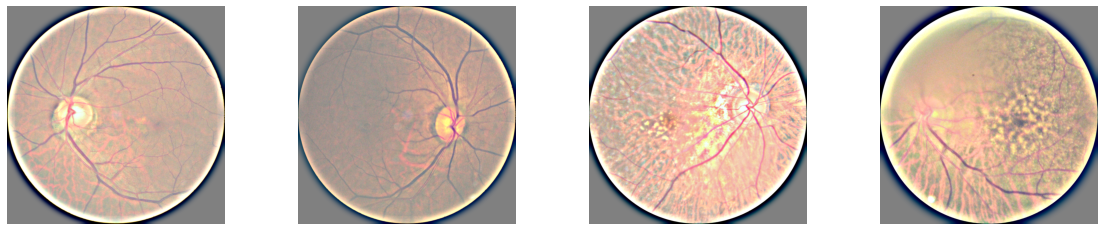

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def crop_image_from_gray(img,tol=7):
   
    
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = gray_img>tol        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        
        return img

def circle_crop_v2(img):
    
    """
    Create circular crop around image centre
    """
    img = cv2.imread(img)
    img = crop_image_from_gray(img)

    height, width, depth = img.shape
    largest_side = np.max((height, width))
    img = cv2.resize(img, (largest_side, largest_side))

    height, width, depth = img.shape

    x = int(width / 2)
    y = int(height / 2)
    r = np.amin((x, y))

    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x, y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , 30) ,-4 ,128)

    return img





    
    
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,4))

cropimg =  circle_crop_v2('cataract_001.png')
ax[0].imshow(cv2.cvtColor(cropimg, cv2.COLOR_BGR2RGB))
ax[0].axis('off')

cropimg =  circle_crop_v2('cataract_004.png')
ax[1].imshow(cv2.cvtColor(cropimg, cv2.COLOR_BGR2RGB))
ax[1].axis('off')

cropimg =  circle_crop_v2('Retina_004.png')
ax[2].imshow(cv2.cvtColor(cropimg, cv2.COLOR_BGR2RGB))
ax[2].axis('off')

cropimg =  circle_crop_v2('Retina_005.png')
ax[3].imshow(cv2.cvtColor(cropimg, cv2.COLOR_BGR2RGB))
ax[3].axis('off')
